# GMM

In [20]:
import numpy as np
from kmeans import KMeans

from data_loader import toy_dataset, load_digits
from utils import Figure
from matplotlib.patches import Ellipse

class GMM():
    '''
        Fits a Gausian Mixture model to the data.

        attrs:
            n_cluster : Number of mixtures (Int)
            e : error tolerance (Float) 
            max_iter : maximum number of updates (Int)
            init : initialization of means and variance
                Can be 'random' or 'kmeans' 
            means : means of Gaussian mixtures (n_cluster X D numpy array)
            variances : variance of Gaussian mixtures (n_cluster X D X D numpy array) 
            pi_k : mixture probabilities of different component ((n_cluster,) size numpy array)
    '''

    def __init__(self, n_cluster, init='k_means', max_iter=100, e=0.0001):
        self.n_cluster = n_cluster
        self.e = e
        self.max_iter = max_iter
        self.init = init
        self.means = None
        self.variances = None
        self.pi_k = None

    def fit(self, x):
        '''
            Fits a GMM to x.

            x: is a NXD size numpy array
            updates:
                self.means
                self.variances
                self.pi_k
        '''
        assert len(x.shape) == 2, 'x can only be 2 dimensional'

        np.random.seed(42)
        N, D = x.shape

        if (self.init == 'k_means'):
            # TODO
            # - comment/remove the exception
            # - initialize means using k-means clustering
            # - compute variance and pi_k (see P4.pdf)

            # DONOT MODIFY CODE ABOVE THIS LINE
            #raise Exception(
            #    'Implement initialization of variances, means, pi_k using k-means')
            
            kmean = KMeans(self.n_cluster, self.max_iter, self.e) # self.n_cluster self.max_iter 
            self.means, ymu, _ = kmean.fit(x) # self.means
            self.pi_k = np.array([np.sum(ymu == k) for k in range(self.n_cluster)]) / N #self.pi_k self.n_cluster
            
            # gamma_ik = {0, 1} at this initialize
            self.variances = np.zeros((n_cluster, D, D)) #self.variances self.n_cluster self.means
            for k in range(self.n_cluster):
                xt = x[ymu == k,:] - self.means[k,:] 
                self.variances[k, :, :] = np.dot(np.transpose(xt),xt) / np.sum(ymu==k) #self.variances 
            
            # DONOT MODIFY CODE BELOW THIS LINE

        elif (self.init == 'random'):
            # TODO
            # - comment/remove the exception
            # - initialize means randomly
            # - initialize variance to be identity and pi_k to be uniform

            # DONOT MODIFY CODE ABOVE THIS LINE
            #raise Exception(
            #    'Implement initialization of variances, means, pi_k randomly')
            
            self.means = np.random.rand(self.n_cluster, D) # self.means self.n_cluster
            self.pi_k = np.random.rand(self.n_cluster,) #self.pi_k self.n_cluster
            self.variances = np.random.rand(self.n_cluster, D, D) #self.variances self.n_cluster
            
            # DONOT MODIFY CODE BELOW THIS LINE

        else:
            raise Exception('Invalid initialization provided')

        # TODO
        # - comment/remove the exception
        # - Use EM to learn the means, variances, and pi_k and assign them to self
        # - Update until convergence or until you have made self.max_iter updates.
        # - Return the number of E/M-Steps executed (Int) 
        # Hint: Try to separate E & M step for clarity
        # DONOT MODIFY CODE ABOVE THIS LINE
        #raise Exception('Implement fit function (filename: gmm.py)')
        
        #4
        l = self.compute_log_likelihood(x, self.means, self.variances, self.pi_k)
        gamma = np.zeros((N, self.n_cluster))
        for itr in range(self.max_iter):
            print("Iteration,", itr)
            #print('variances', self.variances[0,:,:])
            #print('means', self.means[0,:] )
            # 6 E step
            for n in range(N):
                sumnorm = .0
                normk = np.zeros(self.n_cluster)
                for k in range(self.n_cluster):
                    gaus = self.Gaussian_pdf(
                        self.means[k,:], self.variances[k,:]).getLikelihood(x[n,:])
                    #if gaus ==0:
                    #    print('gaus is 0 when n, k', n , k)
                    normk[k]= self.pi_k[k] * gaus
                    sumnorm += normk[k]

                #if n == (N-3):
                #    print('-2 ', normk, sumnorm)
                gamma[n, :] = normk / sumnorm
            print('min gamma', np.min(gamma))
            #print('gamma',gamma)
            #print('gamma -3 :', gamma[-3,:])
            #print(np.isnan(gamma[-3,0]))
            print('Estep')
            # 7 M step
            # eq.(5)
            Nk = np.sum(gamma, axis=0)
            print('Nk',Nk)
            # eq.(6)
            means2 = np.zeros(self.means.shape)
            for k in range(self.n_cluster):
                means2[k, :] = np.sum(np.multiply(gamma[:, k].reshape(gamma.shape[0],1), x), axis=0)/Nk[k]
            
            print('means', means2[0,:])
            print('Eq6')
            # eq.(7)
            variances2 = np.zeros(self.variances.shape)
            for k in range(self.n_cluster):
                sumvark = .0
                for n in range(N):
                    xmu = x[n, :] - self.means[k, :]
                    sumvark += gamma[n, k]*(np.dot(np.transpose(xmu), xmu))
                variances2[k, :, :] = sumvark / Nk[k]
            print(variances2[0, :, :])
            
            print('Eq7')
            # eq.(8)
            self.pi_k = Nk / N
            self.means = means2
            self.variances = variances2
            print('variances', self.variances)
            print('Eq8')
            l1 = self.compute_log_likelihood(x, self.means, self.variances, self.pi_k)
            
            # stop condition
            if abs(l-l1) < self.e:
                break
            l = l1
            
        return itr
        
        # DONOT MODIFY CODE BELOW THIS LINE


    def sample(self, N):
        '''
        sample from the GMM model

        N is a positive integer
        return : NXD array of samples

        '''
        assert type(N) == int and N > 0, 'N should be a positive integer'
        np.random.seed(42)
        if (self.means is None):
            raise Exception('Train GMM before sampling')

        # TODO
        # - comment/remove the exception
        # - generate samples from the GMM
        # - return the samples

        # DONOT MODIFY CODE ABOVE THIS LINE
        #raise Exception('Implement sample function in gmm.py')
        samples = np.zeros((N, self.means.shape[1]))
        firstsa = np.random.choice(self.n_cluster, N, p=self.pi_k)
        print('means', self.means.shape)
        print('variance', self.variances.shape)
        print('firstsa ',firstsa[0])
        print('firstsa ', type(firstsa))
        for n in range(N):
            samples[n] = np.random.multivariate_normal(
                self.means[firstsa[n]], 
                self.variances[firstsa[n]])
        
        
        # DONOT MODIFY CODE BELOW THIS LINE
        return samples        

    def compute_log_likelihood(self, x, means=None, variances=None, pi_k=None):
        '''
            Return log-likelihood for the data

            x is a NXD matrix
            return : a float number which is the log-likelihood of data
        '''
        assert len(x.shape) == 2,  'x can only be 2 dimensional'
        if means is None:
            means = self.means
        if variances is None:
            variances = self.variances
        if pi_k is None:
            pi_k = self.pi_k    
        # TODO
        # - comment/remove the exception
        # - calculate log-likelihood using means, variances and pi_k attr in self
        # - return the log-likelihood (Float)
        # Note: you can call this function in fit function (if required)
        # DONOT MODIFY CODE ABOVE THIS LINE
        #raise Exception('Implement compute_log_likelihood function in gmm.py')
        N, D = x.shape
        K = self.pi_k.shape[0]
        log_likelihood = .0
        #for n in range(3):
        for n in range(N):
            lnk = .0
            #print(lnk)
            for k in range(K):
                lnk += self.pi_k[k] * self.Gaussian_pdf(
                    self.means[k,:], self.variances[k,:]).getLikelihood(x[n,:])
            #print(lnk)
            log_likelihood += np.log(lnk)
        
        # DONOT MODIFY CODE BELOW THIS LINE
        return log_likelihood.tolist()

    class Gaussian_pdf():
        def __init__(self,mean,variance):
            self.mean = mean
            self.variance = variance
            self.c = None
            self.inv = None
            '''
                Input: 
                    Means: A 1 X D numpy array of the Gaussian mean
                    Variance: A D X D numpy array of the Gaussian covariance matrix
                Output: 
                    None: 
            '''
            # TODO
            # - comment/remove the exception
            # - Set self.inv equal to the inverse the variance matrix (after ensuring it is full rank - see P4.pdf)
            # - Set self.c equal to ((2pi)^D) * det(variance) (after ensuring the variance matrix is full rank)
            # Note you can call this class in compute_log_likelihood and fit
            # DONOT MODIFY CODE ABOVE THIS LINE
            #raise Exception('Impliment Guassian_pdf __init__')
            D = self.variance.shape[1] # self.variance
            while np.linalg.matrix_rank(self.variance) != len(self.variance): # self.variance
                #print('inverse')
                #print(self.variance)
                self.variance += 1e-3 * np.identity(len(self.variance)) # self.variance
            self.inv = np.linalg.inv(self.variance) # self.variance self.inv
            self.c = ((2*np.pi)**D) * np.linalg.det(self.variance) # self.c self.variance            
            
            
            # DONOT MODIFY CODE BELOW THIS LINE

        def getLikelihood(self,x):
            '''
                Input: 
                    x: a 1 X D numpy array representing a sample
                Output: 
                    p: a numpy float, the likelihood sample x was generated by this Gaussian
                Hint: 
                    p = e^(-0.5(x-mean)*(inv(variance))*(x-mean)') / sqrt(c)
                    where ' is transpose and * is matrix multiplication
            '''
            #TODO
            # - Comment/remove the exception
            # - Calculate the likelihood of sample x generated by this Gaussian
            # Note: use the described implementation of a Gaussian to ensure compatibility with the solutions
            # DONOT MODIFY CODE ABOVE THIS LINE
            #raise Exception('Impliment Guassian_pdf getLikelihood')
            p = np.exp(-0.5 * np.dot(np.dot((x - self.mean), self.inv),
                                     np.transpose(x - self.mean))) / np.sqrt(self.c) # self.mean self.inv self.c
            if np.abs(p) < 1e-320:
                p = 1e-320
            # DONOT MODIFY CODE BELOW THIS LINE
            return p

## test

In [ ]:
import numpy as np
from data_loader import toy_dataset, load_digits
from utils import Figure
from matplotlib.patches import Ellipse


def compute_elipse_params(variance):
    '''
        Compute elipse params for plotting from variance
    '''

    # http://www.cs.cornell.edu/cv/OtherPdf/Ellipse.pdf Slide 17
    # https://stackoverflow.com/a/41821484

    variance_inv = np.linalg.inv(variance)
    a = variance_inv[0, 0]
    c = variance_inv[1, 1]
    b = variance_inv[0, 1] + variance_inv[1, 0]

    M = (variance_inv + variance_inv.T) / 2
    eig, _ = np.linalg.eig(M)
    if (np.abs(eig[0] - a) < np.abs(eig[0] - c)):
        lambda1, lambda2 = eig
    else:
        lambda2, lambda1 = eig

    angle = np.arctan(b / (a - c)) / 2
    return np.sqrt(1 / lambda1), np.sqrt(1 / lambda2), angle


################################################################################
# GMM on 2D toy dataset
# The dataset is generated from N gaussian distributions equally spaced on N radius circle.
# Here, N=4
# You should be able to visualize the learnt gaussian distribution in plots folder
# Complete implementation of fit function for GMM class in gmm.py
################################################################################
x, y = toy_dataset(4, 100)
init = ['k_means', 'random']
'''
for i in init:
    n_cluster = 4
    gmm = GMM(n_cluster=n_cluster, max_iter=1000, init=i, e=1e-6)
    iterations = gmm.fit(x)
    ll = gmm.compute_log_likelihood(x)

    assert gmm.means.shape == (
        n_cluster, 2), 'means should be numpy array with {}X2 shape'.format(n_cluster)

    assert gmm.variances.shape == (
        n_cluster, 2, 2), 'variances should be numpy array with {}X2X2 shape'.format(n_cluster)

    assert gmm.pi_k.shape == (
        n_cluster,), 'pi_k should be numpy vector of size'.format(n_cluster)

    assert iterations > 0 and type(
        iterations) == int, 'Number of updates should be positive integer'

    assert type(ll) == float, 'log-likelihood should be float'

    print('GMM for toy dataset with {} init converged in {} iteration. Final log-likelihood of data: {}'.format(
        i, iterations, ll))

    np.savez('results/gmm_toy_{}.npz'.format(i), iterations=iterations,
             variances=gmm.variances, pi_k=gmm.pi_k, means=gmm.means, log_likelihood=ll, x=x, y=y)

    # plot
    fig = Figure()
    fig.ax.scatter(x[:, 0], x[:, 1], c=y)
    # fig.ax.scatter(gmm.means[:, 0], gmm.means[:, 1], c='red')
    for component in range(n_cluster):
        a, b, angle = compute_elipse_params(gmm.variances[component])
        e = Ellipse(xy=gmm.means[component], width=a * 5, height=b * 5,
                    angle=angle, alpha=gmm.pi_k[component])
        fig.ax.add_artist(e)
    fig.savefig('plots/gmm_toy_dataset_{}.png'.format(i))

'''
################################################################################
# GMM on digits dataset
# We fit a gaussian distribution on digits dataset and show generate samples from the distribution
# Complete implementation of sample function for GMM class in gmm.py
################################################################################

x_train, x_test, y_train, y_test = load_digits()

for i in init:
    n_cluster = 30
    gmm = GMM(n_cluster=n_cluster, max_iter=1000, init=i, e=1e-10)
    iterations = gmm.fit(x_train)
    ll = gmm.compute_log_likelihood(x_train)
    print('GMM for digits dataset with {} init converged in {} iterations. Final log-likelihood of data: {}'.format(i, iterations, ll))

    # plot cluster means
    means = gmm.means
    from matplotlib import pyplot as plt
    l = int(np.ceil(np.sqrt(n_cluster)))

    im = np.zeros((10 * l, 10 * l))
    for m in range(l):
        for n in range(l):
            if (m * l + n < n_cluster):
                im[10 * m:10 * m + 8, 10 * n:10 * n +
                    8] = means[m * l + n].reshape([8, 8])
    im = (im > 0) * im
    plt.imsave('plots/means_{}.png'.format(i), im, cmap='Greys')

    # plot samples
    N = 100
    l = int(np.ceil(np.sqrt(N)))
    samples = gmm.sample(N)

    assert samples.shape == (
        N, x_train.shape[1]), 'Samples should be numpy array with dimensions {}X{}'.format(N, x_train.shape[1])

    im = np.zeros((10 * l, 10 * l))
    for m in range(l):
        for n in range(l):
            if (m * l + n < N):
                im[10 * m: 10 * m + 8, 10 * n: 10 * n +
                    8] = samples[m * l + n].reshape([8, 8])
    im = (im > 0) * im
    plt.imsave('plots/samples_{}.png'.format(i), im, cmap='Greys')

    np.savez('results/gmm_digits_{}.npz'.format(i), iterations=np.array(
        [iterations]), variances=gmm.variances, pi_k=gmm.pi_k, means=gmm.means, samples=samples, log_likelihood=ll, x=x_test, y=y_test)


Iteration, 0
min gamma 0.0
Estep
Nk [ 30.          24.          36.          38.          36.
  36.          34.          48.00037353  39.00000191  69.02488444
 115.          28.          34.          28.99999809  21.
  14.          42.          61.          58.00000002  49.96384625
  33.          52.          40.99999998  25.          57.
  37.          95.99962647  20.          37.         107.0112693 ]
means [0.00000000e+000 0.00000000e+000 1.25573303e-082 1.93750000e-001
 8.43750000e-001 2.16666667e-001 4.16666667e-003 3.48382103e-141
 0.00000000e+000 6.56171236e-264 2.50000000e-002 6.83333333e-001
 8.83333333e-001 1.91666667e-001 7.91666667e-002 3.75000000e-002
 0.00000000e+000 2.08333333e-003 3.66666667e-001 9.43750000e-001
 6.31250000e-001 3.62500000e-001 1.93750000e-001 3.33333333e-002
 6.89606685e-286 1.70833333e-001 8.62500000e-001 6.16666667e-001
 6.35416667e-001 5.31250000e-001 2.41666667e-001 2.08333333e-003
 0.00000000e+000 5.02083333e-001 9.79166667e-001 7.66666667e-001


Iteration, 2
min gamma 1.4236320167834894e-168
Estep
Nk [ 23.77349159  27.27596439  38.78832839  46.79327399  27.52720079
  26.90158259  28.52720079  41.91641939  81.17754698  62.56181998
 169.51285856  23.14787339  25.65034619  28.15281899  24.39910979
  10.0098912   46.16765579  41.29080119  77.32047478  50.42383778
  28.15281899  47.54698318  42.54203759  14.3892186   49.42383778
  48.16765579  71.94609298  23.14787339  39.66023739  80.70474777]
means [0.00000000e+00 2.07015810e-02 3.34930830e-01 7.33745059e-01
 7.43725296e-01 3.76828063e-01 8.97233202e-02 8.84387352e-03
 3.95256917e-04 1.30533597e-01 6.49258893e-01 7.40859684e-01
 6.43330040e-01 5.23270751e-01 1.23863636e-01 7.85573123e-03
 2.47035573e-04 1.61264822e-01 6.07855731e-01 4.38735178e-01
 4.49901186e-01 4.99851779e-01 1.16007905e-01 3.40909091e-03
 9.88142292e-05 1.44861660e-01 5.56669960e-01 5.59387352e-01
 6.28705534e-01 4.81324111e-01 1.46887352e-01 1.48221344e-04
 0.00000000e+00 1.38833992e-01 4.69318182e-01 5.74061

GMM for digits dataset with k_means init converged in 3 iterations. Final log-likelihood of data: -992506.9591584492
means (30, 64)
variance (30, 64, 64)
firstsa  10
firstsa  <class 'numpy.ndarray'>


C:\Users\Takato\Anaconda3\lib\site-packages\ipykernel_launcher.py:284: RuntimeWarning: invalid value encountered in sqrt


Iteration, 0


C:\Users\Takato\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Takato\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
C:\Users\Takato\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1794: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


min gamma nan
Estep
Nk [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
means [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
Eq6
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Eq7
variances [[[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]]

 [[nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  ...
  [nan nan nan ... nan nan nan]
  [nan nan nan ... nan nan nan]
  [nan nan 

In [ ]:
n_cluster = 30
gmm = GMM(n_cluster=n_cluster, max_iter=1000, init='random', e=1e-10)
gmm.fit(x)
N = 100
l = int(np.ceil(np.sqrt(N)))
samples = gmm.sample(N)

C:\Users\Takato\Anaconda3\lib\site-packages\ipykernel_launcher.py:281: RuntimeWarning: invalid value encountered in sqrt


Iteration, 0


C:\Users\Takato\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Takato\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
C:\Users\Takato\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1794: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


min gamma nan
Estep
Nk [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
means [nan nan]
Eq6
[[nan nan]
 [nan nan]]
Eq7
variances [[[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]

 [[nan nan]
  [nan nan]]]
Eq8


In [6]:
np.isnan(3)

False

In [2]:
2.902e-320/2.902e-320

1.0

In [5]:
np.array([0.000e+000, 2.902e-320, 0.000e+000, 0.000e+000])/2.902e-320

array([0., 1., 0., 0.])

In [6]:
bb = np.array([0.000e+000, 2.902e-320, 0.000e+000, 0.000e+000])


C:\Users\Takato\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


array([         -inf, -735.76178081,          -inf,          -inf])

In [18]:
1e-323

1e-323

In [19]:
1e-324

0.0

In [6]:
type(ll)

numpy.float64

In [10]:
type(ll.tolist())

float

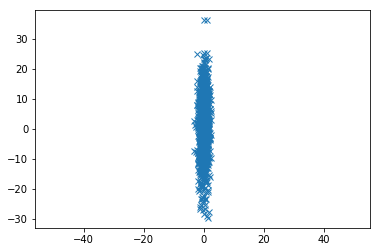

In [7]:
%matplotlib inline
mean = [0, 0]
cov = [[1, 0], [0, 100]] 

import matplotlib.pyplot as plt
x, y = np.random.multivariate_normal(mean, cov, 1000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [8]:
np.random.choice(5, 3, p=[0.1, 0, 0.3, 0.6, 0])

array([3, 2, 3], dtype=int64)

In [10]:
np.random.choice(4, 20)

array([0, 2, 3, 0, 1, 2, 0, 0, 3, 0, 3, 1, 3, 2, 0, 1, 3, 3, 3, 1])

In [13]:
np.random.multivariate_normal(mean, cov, 1).T

array([[0.83785379],
       [9.19560547]])

In [5]:
mean2 = [0.1, -0.1, 0]
cov2 = [[1.1, 0,0.1], [0, 100.6,0], [0, 0.6, 10]] 
np.random.multivariate_normal(mean2, cov2, 1)

C:\Users\Takato\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[ 0.59145171, -6.14549855, -1.37112586]])

In [6]:
np.random.multivariate_normal(mean2, cov2)

C:\Users\Takato\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  """Entry point for launching an IPython kernel.


array([-0.01355634, -7.19886701,  2.24800598])

In [14]:
ccc=np.array(range(27)).reshape((3,3,3))

In [16]:
ccc[0]

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [17]:
ccc

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])